In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)         # 리스트 타입을 가져옴
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)   # numpy를 변경
x_np

tensor([[1, 2],
        [3, 4]])

In [4]:
x_ones = torch.ones_like(x_data)
x_ones
# x_data의 속성 유지함

tensor([[1, 1],
        [1, 1]])

In [5]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
x_rand
# x_data의 속성을 float로 덮어씀

tensor([[0.0617, 0.5256],
        [0.2861, 0.4361]])

In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n{rand_tensor} \n")
print(f"Ones Tensor: \n{ones_tensor} \n")
print(f"Zeros Tensor: \n{zeros_tensor} \n")

Random Tensor: 
tensor([[0.6775, 0.6900, 0.6161],
        [0.7560, 0.5263, 0.7168]]) 

Ones Tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [46]:
if torch.cuda.is_available():
  print("true")
  tensor = tensor.to("cuda")
  # GPU 사용 가능시 cuda로 변경
  print(f"Device tensor is stored on: {tensor.device}")

true
Device tensor is stored on: cuda:0


In [9]:
tensor = torch.ones(4,4)
print(f"first row: {tensor[0]}")
print(f"first col: {tensor[:,0]}")
print(f"last col: {tensor[...,-1]}")
tensor[:,1] = 0
print(tensor)

first row: tensor([1., 1., 1., 1.])
first col: tensor([1., 1., 1., 1.])
last col: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1
# 여러 개의 torch를 붙여서 합침 -> 차원 그대로

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [11]:
t2 = torch.stack([tensor, tensor, tensor])
t2
# 여러 개의 torch를 쌓아올려서 차원이 증가함

tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])

In [12]:
y1 = tensor @ tensor.T    # 행렬곱
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [13]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

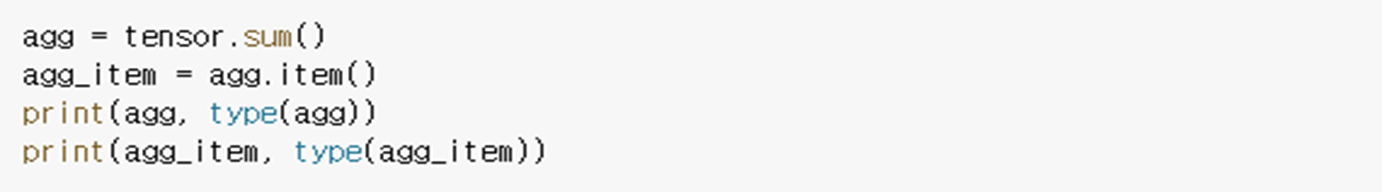

요소가 하나인 텐서의 경우, item() 을 사용하여 Python 숫자 값으로 변환 가능

In [14]:
tensor.add_(5)  # 웬만하면 건들지 말라는 뜻
tensor

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])

In [15]:
t = torch.ones(5)
t

tensor([1., 1., 1., 1., 1.])

In [16]:
n = t.numpy()
n

array([1., 1., 1., 1., 1.], dtype=float32)

In [17]:
t.add_(1)
t

tensor([2., 2., 2., 2., 2.])

In [18]:
n

array([2., 2., 2., 2., 2.], dtype=float32)

# Fashon-MNIST

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root='data',          # 저장경로
    train=True,
    download=True,        # root에 데이터가 없는 경우 인터넷에서 다운로드
    transform=ToTensor()  # 데이터 변형
)
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

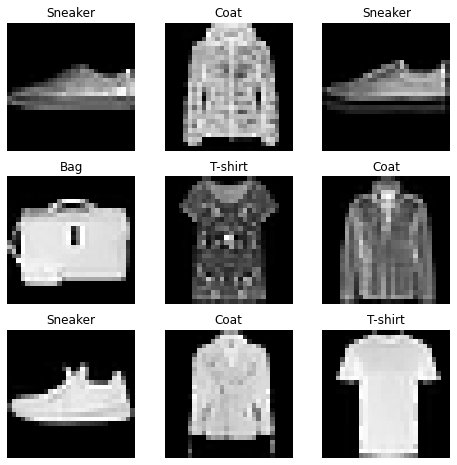

In [2]:
# 데이터셋 시각화
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()



## 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개의 함수 구현이 필요함
- init
- len
- getitem

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


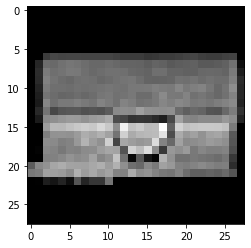

Label: 8


In [72]:
# 순회하기
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## 신경망 모델 구성

In [73]:
import os
import torch
from torch import nn

In [74]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [76]:
input_image = torch.rand(3,28,28)

In [105]:
flatten = nn.Flatten() # 초기화
flat_image = flatten(input_image)
# 연속된 배열로 변환

In [106]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
# w, b를 사용해 입력에 선형 변환 적용

In [107]:
hidden1 = nn.ReLU()(hidden1)
# 비선형성 도입

In [108]:
# 순서를 갖는 모듈의 컨테이너
seq_modules = nn.Sequential(
    flatten,          # 인스턴스
    layer1,           # 인스턴스
    nn.ReLU(),        # 클래스
    nn.Linear(20,10)  # 클래스
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits.shape 

torch.Size([3, 10])

In [109]:
softmax = nn.Softmax(dim=1)
# 예측 확률 [0,1] 범위 내 -> 합이 1
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.1328, 0.0818, 0.0948, 0.0809, 0.1240, 0.1148, 0.1011, 0.0831, 0.0948,
         0.0918],
        [0.1254, 0.0956, 0.0935, 0.0863, 0.1145, 0.1154, 0.0949, 0.0868, 0.0910,
         0.0967],
        [0.1284, 0.0945, 0.0925, 0.0894, 0.1150, 0.1160, 0.0897, 0.0874, 0.0897,
         0.0974]], grad_fn=<SoftmaxBackward0>)


In [128]:
input_image.to("cuda")
logits.to("cuda")
pred_probab.to("cuda")

tensor([[0.1030, 0.0953, 0.0989, 0.1067, 0.0976, 0.1012, 0.0999, 0.0921, 0.1007,
         0.1045]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [110]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn. Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [111]:
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [112]:
X = torch.rand(1,28,28, device=device)
logits = model(X)
print(logits)

pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)

y_pred = pred_probab.argmax(1)
print("Predicted class:", y_pred)

tensor([[ 0.0153, -0.0615, -0.0247,  0.0515, -0.0379, -0.0022, -0.0143, -0.0961,
         -0.0064,  0.0304]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.1030, 0.0953, 0.0989, 0.1067, 0.0976, 0.1012, 0.0999, 0.0921, 0.1007,
         0.1045]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([3], device='cuda:0')


In [113]:
print("Model structure:", model)
for name, param in model.named_parameters():
  print(f"\nLayer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0347,  0.0082,  0.0340,  ...,  0.0131, -0.0353,  0.0015],
        [-0.0193,  0.0218,  0.0042,  ...,  0.0213, -0.0156,  0.0177]],
       device='cuda:0', grad_fn=<SliceBackward0>) 


Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([0.0288, 0.0244], device='cuda:0', grad_fn=<SliceBackward0>) 


Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0341, -0.0322,  0.0050,  ..., -0.0209,  0.0028,  0.0439],
        [-0.0358,  0.0155, -0.0223,  ..., -0.0383, -0.0375, -0.0221]],
       device='cuda:0', grad_fn=<SliceB

## 자동미분

In [114]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x,w)+b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

In [115]:
loss.backward()
print(w.grad, b.grad)

tensor([[0.3144, 0.0912, 0.3305],
        [0.3144, 0.0912, 0.3305],
        [0.3144, 0.0912, 0.3305],
        [0.3144, 0.0912, 0.3305],
        [0.3144, 0.0912, 0.3305]]) tensor([0.3144, 0.0912, 0.3305])


In [116]:
z = torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
  z = torch.matmul(x,w)+b
print(z.requires_grad)

True
False


In [117]:
z = torch.matmul(x,w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


### 하이퍼 파라미터
:: 모델 최적화 과정을 제어할 수 있는 조절 가능한 매개변수. 서로 다른 하이퍼파라미터값은 모델 학습과 수렴율(convergence rate)에 영향을 미칠 수 있다.

- 에폭(epoch) 수 : 데이터셋을 반복하는 횟수
- 배치 크기(batch size) : 매개변수가 갱신되기 전 신경망을 통해 전파된 데이터 샘플의 수
- 학습률(learning rate) : 각 배치/에폭에서 모델의 매개변수를 조절하는 비율. 값이 작을수록 학습 속도가 느려지고, 값이 크면 학습 중 예측할 수 없는 동작 가능


In [118]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [119]:
loss_fn = nn.CrossEntropyLoss()
# 손실 함수는 획득한 결과와 실제 값 사이의 틀린 정도(degree of dissimilarity)를 측정

In [120]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 최적화 : 각 학습 단계에서 모델의 오류를 줄이기 위해 모델 매개변수를 조정

학습 단계에서 최적화 단계 :
- optimizer.zero_grad()를 호출하여 모델 매개변수의 변화도를 재설정. 기본적으로 변화도는 더해지기 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정
- loss.backward()를 호출하여 예측 손실(prediction loss)을 역전파.
- 변화도를 계산한 뒤에는 optimizer.step()을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정

In [130]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X,y) in enumerate(dataloader):
    # 예측, 손실 계산
    pred = model(X.to(device))
    loss = loss_fn(pred, y.to(device))

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%100 == 0:
      loss, current = loss.item(), batch*len(X)
      print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')


In [131]:
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X.to(device))
      test_loss += loss_fn(pred, y.to(device)).item()
      correct += (pred.argmax(1)==y.to(device)).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n')

In [132]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs=10
for t in range(epochs):
  print(f"Epoch {t+1}\n--------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
--------------------------
loss: 2.303634 [    0/60000]
loss: 2.292977 [ 6400/60000]
loss: 2.272920 [12800/60000]
loss: 2.273940 [19200/60000]
loss: 2.259810 [25600/60000]
loss: 2.230798 [32000/60000]
loss: 2.230890 [38400/60000]
loss: 2.214984 [44800/60000]
loss: 2.195366 [51200/60000]
loss: 2.189099 [57600/60000]
Test Error: 
 Accuracy: 43.7%, Avg loss: 2.170850

Epoch 2
--------------------------
loss: 2.193718 [    0/60000]
loss: 2.148694 [ 6400/60000]
loss: 2.130334 [12800/60000]
loss: 2.114335 [19200/60000]
loss: 2.075324 [25600/60000]
loss: 2.039566 [32000/60000]
loss: 2.069565 [38400/60000]
loss: 2.000531 [44800/60000]
loss: 1.976864 [51200/60000]
loss: 1.930721 [57600/60000]
Test Error: 
 Accuracy: 52.6%, Avg loss: 1.924382

Epoch 3
--------------------------
loss: 1.965522 [    0/60000]
loss: 1.871760 [ 6400/60000]
loss: 1.845078 [12800/60000]
loss: 1.816458 [19200/60000]
loss: 1.705812 [25600/60000]
loss: 1.765882 [32000/60000]
loss: 1.616608 [38400/60000]
loss: 1.54

## 모델 저장, 불러오기

In [133]:
import torchvision.models as models

In [136]:
# 저장
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [137]:
# 불러오기
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [138]:
torch.save(model, 'model.pth')

In [139]:
model = torch.load('model.pth')

---

## Dataset and DataLoader

In [142]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)

training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

classes = ("T-shirt",     "Trouser",     "Pullover",    "Dress",     "Coat",
     "Sandal",     "Shirt",     "Sneaker",    "Bag",    "Ankle Boot")

print(len(training_set), len(validation_set))

60000 10000


In [143]:
import torch.nn as nn
import torch.nn.functional as F

class GarmentClassifier(nn.Module):
  def __init__(self):
    super(GarmentClassifier, self).__init__()
    self.conv1 = nn.Conv2d(1,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*4*4, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*4*4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = GarmentClassifier()

In [145]:
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [155]:
def train_one_epoch(epoch_index, tb_writer):
  running_loss = 0.
  last_loss = 0.

  for i, data in enumerate(training_loader):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = loss_fn(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.item()
    if i % 1000 == 999:
      last_loss = running_loss / 1000
      print(i+1, last_loss)
      tb_x = epoch_index * len(training_loader) + i + 1
      tb_writer.add_scalar('Loss/trian', last_loss, tb_x)
      running_loss = 0.

  return last_loss

In [156]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number=0

EPOCHS = 5
best_vloss = 1_000_000.

for epoch in range(EPOCHS):
  print('EPOCH {}:'.format(epoch_number+1))

  model.train(True)
  avg_loss = train_one_epoch(epoch_number, writer)
  
  model.train(False)

  running_vloss = 0.0
  for i, vdata in enumerate(validation_loader):
    vinputs, vlabels = vdata
    voutputs = model(vinputs)
    vloss = loss_fn(voutputs, vlabels)
    running_vloss += vloss

  avg_vloss = running_vloss / (i+1)
  print("LOSS train {} valid {}".format(avg_loss, avg_vloss))

  writer.add_scalars('Training vs Validation Loss',
                     {'Training':avg_loss, 'Validation':avg_vloss},
                     epoch_number+1)
  writer.flush()

  if avg_vloss < best_vloss:
    best_vloss = avg_vloss
    model_path = 'model_{}_{}'.format(timestamp, epoch_number)
    torch.save(model.state_dict(), model_path)

EPOCH 1:
1000 0.8765926986187697
2000 0.766926512429025
3000 0.6773088348824531
4000 0.620069843754638
5000 0.5634515302411747
6000 0.5574523709777277
7000 0.5209640855161706
8000 0.5040883501113858
9000 0.4912387426975183
10000 0.4786729016731551
11000 0.47711505536775806
12000 0.4660015988579107
13000 0.4584936940560583
14000 0.41338949772293565
15000 0.4014222576254979
LOSS train 0.4014222576254979 valid 0.4545075297355652
EPOCH 1:
1000 0.4127576839183457
2000 0.38989706629799914
3000 0.3871137388818897
4000 0.38619257721118627
5000 0.38456338575005067
6000 0.3536709014461958
7000 0.36744457065232566
8000 0.37062574935902376
9000 0.38208696356258587
10000 0.366746322327177
11000 0.3718276538696373
12000 0.34465133001923093
13000 0.3479651276350778
14000 0.3580603939119028
15000 0.3590354391394649
LOSS train 0.3590354391394649 valid 0.3810981810092926
EPOCH 1:
1000 0.34630804783418717
2000 0.3221356705968501
3000 0.32406714720894525
4000 0.3147063047093907
5000 0.3422399915249407
600

In [151]:
writer

# Transfer Learning

In [169]:
model_ft = models.resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [189]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # 대화형 모드

In [190]:
# 학습을 위해 데이터 증가(augmentation) 및 일반화(normalization)
# 검증을 위한 일반화
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
!unzip /content/hymenoptera_data

In [193]:
data_dir = '/content/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),  data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


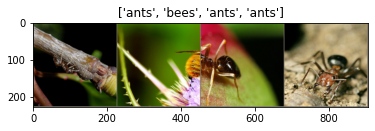

In [194]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신이 될 때까지 잠시 기다립니다.


# 학습 데이터의 배치를 얻습니다.
inputs, classes = next(iter(dataloaders['train']))

# 배치로부터 격자 형태의 이미지를 만듭니다.
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [184]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # 각 에폭(epoch)은 학습 단계와 검증 단계를 갖습니다.
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # 모델을 학습 모드로 설정
            else:
                model.eval()   # 모델을 평가 모드로 설정

            running_loss = 0.0
            running_corrects = 0

            # 데이터를 반복
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # 매개변수 경사도를 0으로 설정
                optimizer.zero_grad()

                # 순전파
                # 학습 시에만 연산 기록을 추적
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # 학습 단계인 경우 역전파 + 최적화
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 통계
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # 모델을 깊은 복사(deep copy)함
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # 가장 나은 모델 가중치를 불러옴
    model.load_state_dict(best_model_wts)
    return model

In [185]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [195]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# 여기서 각 출력 샘플의 크기는 2로 설정합니다.
# 또는, nn.Linear(num_ftrs, len (class_names))로 일반화할 수 있습니다.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# 모든 매개변수들이 최적화되었는지 관찰
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# 7 에폭마다 0.1씩 학습률 감소
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [196]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5626 Acc: 0.6967
val Loss: 0.2149 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.6921 Acc: 0.7090
val Loss: 0.2832 Acc: 0.8758

Epoch 2/24
----------
train Loss: 0.4866 Acc: 0.7951
val Loss: 0.3516 Acc: 0.8758

Epoch 3/24
----------
train Loss: 0.5541 Acc: 0.7787
val Loss: 0.3382 Acc: 0.8889

Epoch 4/24
----------
train Loss: 0.4545 Acc: 0.7787
val Loss: 0.3527 Acc: 0.8497

Epoch 5/24
----------
train Loss: 0.4865 Acc: 0.7951
val Loss: 0.2554 Acc: 0.8954

Epoch 6/24
----------
train Loss: 0.3936 Acc: 0.8402
val Loss: 0.4010 Acc: 0.8431

Epoch 7/24
----------
train Loss: 0.3714 Acc: 0.8279
val Loss: 0.3777 Acc: 0.8889

Epoch 8/24
----------
train Loss: 0.3131 Acc: 0.8975
val Loss: 0.2653 Acc: 0.8889

Epoch 9/24
----------
train Loss: 0.3809 Acc: 0.8689
val Loss: 0.2523 Acc: 0.9020

Epoch 10/24
----------
train Loss: 0.2984 Acc: 0.8648
val Loss: 0.2623 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.2960 Acc: 0.8484
val Loss: 0.2711 Acc: 0.9085

Ep

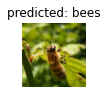

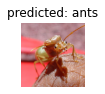

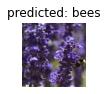

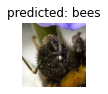

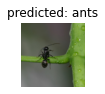

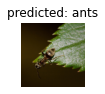

In [197]:
visualize_model(model_ft)

In [198]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# 새로 생성된 모듈의 매개변수는 기본값이 requires_grad=True 임
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# 이전과는 다르게 마지막 계층의 매개변수들만 최적화되는지 관찰
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# 7 에폭마다 0.1씩 학습률 감소
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [199]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6029 Acc: 0.6803
val Loss: 0.2384 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.4083 Acc: 0.7910
val Loss: 0.2032 Acc: 0.9346

Epoch 2/24
----------
train Loss: 0.4942 Acc: 0.7910
val Loss: 0.2600 Acc: 0.8824

Epoch 3/24
----------
train Loss: 0.4724 Acc: 0.7787
val Loss: 0.1884 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.4272 Acc: 0.8033
val Loss: 0.1684 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.4917 Acc: 0.7787
val Loss: 0.3007 Acc: 0.8824

Epoch 6/24
----------
train Loss: 0.4098 Acc: 0.8197
val Loss: 0.3191 Acc: 0.8758

Epoch 7/24
----------
train Loss: 0.3515 Acc: 0.8361
val Loss: 0.1950 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3037 Acc: 0.8893
val Loss: 0.1993 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3867 Acc: 0.8279
val Loss: 0.1883 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.3777 Acc: 0.8115
val Loss: 0.1848 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3488 Acc: 0.8484
val Loss: 0.1926 Acc: 0.9346

Ep

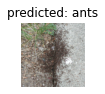

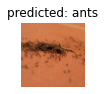

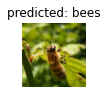

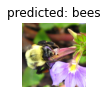

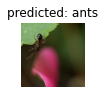

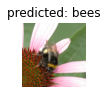

In [200]:
visualize_model(model_conv)

plt.ioff()
plt.show()